# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
from citipy import citipy
import numpy as np
from config import api_key
from pprint import pprint
import time
from scipy.stats import linregress

## Generate Cities List

In [2]:
# Get random numbers for latitude and longitude then place in a dataframe

city_df=pd.DataFrame({"long":(np.random.uniform(-180,180,1500)), "lat":(np.random.uniform(-90,90,1500))})
# city_df.head()
# city_df.tail()
print(city_df)

            long        lat
0     -97.765280  -2.249547
1    -157.278465 -83.063268
2     140.556216 -40.167665
3      31.472408  23.929230
4     150.808568 -31.260165
...          ...        ...
1495   68.867610 -53.856737
1496  -75.029723  46.985148
1497  -75.300889  35.048218
1498 -126.075955 -63.902634
1499 -109.842040  50.119566

[1500 rows x 2 columns]


# Use Citipy to Retrieve City Names

In [3]:
# Create lists to store city and country names
# Source: https://github.com/wingchen/citipy
citi=[]
country=[]

for index, row in city_df.iterrows():
    latitude=row['lat']
    longitude=row['long']
    city=citipy.nearest_city(latitude,longitude)
    cityname=city.city_name
    cntryname=city.country_code
    if cityname not in citi:
        citi.append(cityname)
        country.append(cntryname)
    else:
        pass
print(citi)
print(country)

# Adds new lists to dataframe
tudes={"City":citi,"Country":country}

# Make a dataframe from the dictionary
tudes_df=pd.DataFrame(tudes)
tudes_df

['puerto ayora', 'mataura', 'portland', 'aswan', 'tamworth', 'natal', 'belushya guba', 'port alfred', 'kodinsk', 'nanortalik', 'touros', 'thompson', 'busselton', 'klaksvik', 'albany', 'sungairaya', 'ancud', 'bluff', 'butaritari', 'provideniya', 'kazachinskoye', 'leningradskiy', 'ha tinh', 'atasu', 'noumea', 'bundaberg', 'saskylakh', 'jamestown', 'talnakh', 'peking', 'hermanus', 'torbay', 'qaanaaq', 'fortuna', 'kirakira', 'ribeira grande', 'new norfolk', 'danane', 'lavrentiya', 'oxford', 'faanui', 'kapaa', 'rajshahi', 'pekan', 'barrow', 'nhulunbuy', 'vaini', 'bambous virieux', 'lompoc', 'tilichiki', 'rikitea', 'ushuaia', 'samusu', 'bolungarvik', 'tadine', 'bethel', 'burnie', 'kavaratti', 'yerbogachen', 'longyearbyen', 'khatanga', 'punta arenas', 'manadhoo', 'port elizabeth', 'mahebourg', 'tsihombe', 'tiksi', 'vestmannaeyjar', 'key largo', 'paamiut', 'gejiu', 'taolanaro', 'balakhta', 'luderitz', 'hobart', 'chernyy yar', 'tasiilaq', 'souillac', 'kushima', 'flinders', 'luoyang', 'shimoda',

,City,Country
0,puerto ayora,ec
1,mataura,pf
2,portland,au
3,aswan,eg
4,tamworth,au
...,...,...
605,koungou,yt
606,ati,td
607,ferme-neuve,ca
608,elizabeth city,us


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# https://api.openweathermap.org/data/2.5/weather?q=London,uk&appid=api_key&units=imperial
# https://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=api_key&q=London,uk

url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
query_url=f"{url}&units={units}&appid={api_key}&q="
# query_url = f"{url}appid={api_key}&units={units}&q="

cityid = []
long = []
lat = []
temp = []
humidity = []
clouds = []
wind = []
maxtemp = []
date = []
cityagain=[]
countryagain=[]

# Build query URL
                     
        
for index, row in tudes_df.iterrows():
    cityposition=row['City']
    cntryposition= row['Country']
# Source to slowdown API request: https://stackoverflow.com/questions/52004801/how-to-slow-down-asynchrounous-api-calls-to-match-api-limits/52133209
    time.sleep(1)
    response=requests.get(query_url + cityposition +","+ cntryposition).json()
    # time.sleep(1)
    # pprint(response)
    
    try:
        if (response["message"]=="city not found"):
            print(f"The city can't be found")
            print(f"                          ")
            # pass
                  
    except:
        if len(cityid)<500:
            cityagain.append(response['name'])
            countryagain.append(response['sys']['country'])
            cityid.append(response['id'])
            long.append(response['coord']['lon'])
            lat.append(response['coord']['lat'])
            temp.append(response['main']['temp'])
            humidity.append(response['main']['humidity'])
            clouds.append(response['clouds']['all'])
            wind.append(response['wind']['speed'])
            maxtemp.append(response['main']['temp_max'])
            date.append(response['dt'])
            print(f'The city name is: {response["name"]}')
            print(f'The country is: {response["sys"]["country"]}')
            print(f'The city ID is: {response["id"]}')
            print(f'The longitude information received is: {response["coord"]["lon"]}')
            print(f'The latitude information received is: {response["coord"]["lat"]}')
            print(f'The longitude information received is: {response["coord"]["lon"]}')
            print(f'The temperature is: {response["main"]["temp"]}')
            print(f'The humidity is: {response["main"]["humidity"]}')
            print(f'The cloudiness is: {response["clouds"]["all"]}')
            print(f'The wind speed is: {response["wind"]["speed"]}')
            print(f'The high is: {response["main"]["temp_max"]}')
            print(f"                          ")
        else:
            break

The city name is: Puerto Ayora
The country is: EC
The city ID is: 3652764
The longitude information received is: -90.35
The latitude information received is: -0.74
The longitude information received is: -90.35
The temperature is: 69.01
The humidity is: 94
The cloudiness is: 91
The wind speed is: 3
The high is: 69.01
                          
The city can't be found
                          
The city name is: Portland
The country is: AU
The city ID is: 2152667
The longitude information received is: 141.6
The latitude information received is: -38.33
The longitude information received is: 141.6
The temperature is: 58.23
The humidity is: 91
The cloudiness is: 100
The wind speed is: 8.88
The high is: 58.23
                          
The city name is: Aswān
The country is: EG
The city ID is: 359792
The longitude information received is: 32.91
The latitude information received is: 24.09
The longitude information received is: 32.91
The temperature is: 79.79
The humidity is: 27
The cloudiness

The city name is: Saskylakh
The country is: RU
The city ID is: 2017155
The longitude information received is: 114.08
The latitude information received is: 71.92
The longitude information received is: 114.08
The temperature is: 19.53
The humidity is: 96
The cloudiness is: 100
The wind speed is: 18.03
The high is: 19.53
                          
The city name is: Jamestown
The country is: SH
The city ID is: 3370903
The longitude information received is: -5.72
The latitude information received is: -15.94
The longitude information received is: -5.72
The temperature is: 60.39
The humidity is: 85
The cloudiness is: 100
The wind speed is: 13.44
The high is: 60.39
                          
The city name is: Talnakh
The country is: RU
The city ID is: 1490256
The longitude information received is: 88.4
The latitude information received is: 69.49
The longitude information received is: 88.4
The temperature is: 23
The humidity is: 92
The cloudiness is: 75
The wind speed is: 20.13
The high is: 23


The city name is: Rikitea
The country is: PF
The city ID is: 4030556
The longitude information received is: -134.97
The latitude information received is: -23.12
The longitude information received is: -134.97
The temperature is: 73.94
The humidity is: 81
The cloudiness is: 100
The wind speed is: 17.81
The high is: 73.94
                          
The city name is: Ushuaia
The country is: AR
The city ID is: 3833367
The longitude information received is: -68.3
The latitude information received is: -54.8
The longitude information received is: -68.3
The temperature is: 46.4
The humidity is: 52
The cloudiness is: 75
The wind speed is: 8.05
The high is: 46.4
                          
The city can't be found
                          
The city can't be found
                          
The city name is: Tadine
The country is: NC
The city ID is: 2138285
The longitude information received is: 167.88
The latitude information received is: -21.55
The longitude information received is: 167.88
The te

The city name is: Kushima
The country is: JP
The city ID is: 1895695
The longitude information received is: 131.23
The latitude information received is: 31.46
The longitude information received is: 131.23
The temperature is: 69.53
The humidity is: 56
The cloudiness is: 20
The wind speed is: 14.99
The high is: 71.6
                          
The city name is: Flinders
The country is: AU
The city ID is: 6255012
The longitude information received is: 150.86
The latitude information received is: -34.58
The longitude information received is: 150.86
The temperature is: 75.63
The humidity is: 61
The cloudiness is: 0
The wind speed is: 5.99
The high is: 79
                          
The city name is: Luoyang
The country is: CN
The city ID is: 1801792
The longitude information received is: 112.45
The latitude information received is: 34.68
The longitude information received is: 112.45
The temperature is: 57
The humidity is: 1
The cloudiness is: 100
The wind speed is: 3.76
The high is: 57
      

The city can't be found
                          
The city name is: Aykhal
The country is: RU
The city ID is: 2027296
The longitude information received is: 111.5
The latitude information received is: 66
The longitude information received is: 111.5
The temperature is: 21.2
The humidity is: 92
The cloudiness is: 90
The wind speed is: 8.95
The high is: 21.2
                          
The city name is: Bredasdorp
The country is: ZA
The city ID is: 1015776
The longitude information received is: 20.04
The latitude information received is: -34.53
The longitude information received is: 20.04
The temperature is: 50
The humidity is: 93
The cloudiness is: 20
The wind speed is: 3.36
The high is: 50
                          
The city can't be found
                          
The city name is: Baiyin
The country is: CN
The city ID is: 1817240
The longitude information received is: 104.21
The latitude information received is: 36.56
The longitude information received is: 104.21
The temperature is: 

The city name is: Saint Paul Harbor
The country is: US
The city ID is: 5866583
The longitude information received is: -152.41
The latitude information received is: 57.79
The longitude information received is: -152.41
The temperature is: 48.2
The humidity is: 81
The cloudiness is: 90
The wind speed is: 3.36
The high is: 48.2
                          
The city name is: Tulun
The country is: RU
The city ID is: 2014927
The longitude information received is: 100.58
The latitude information received is: 54.56
The longitude information received is: 100.58
The temperature is: 35.73
The humidity is: 81
The cloudiness is: 4
The wind speed is: 7.7
The high is: 35.73
                          
The city name is: Fasa
The country is: IR
The city ID is: 134721
The longitude information received is: 53.65
The latitude information received is: 28.94
The longitude information received is: 53.65
The temperature is: 46.4
The humidity is: 17
The cloudiness is: 0
The wind speed is: 4.7
The high is: 46.4
  

The city name is: Mao
The country is: TD
The city ID is: 2428394
The longitude information received is: 15.31
The latitude information received is: 14.12
The longitude information received is: 15.31
The temperature is: 87.53
The humidity is: 30
The cloudiness is: 98
The wind speed is: 7.61
The high is: 87.53
                          
The city name is: Pokhara
The country is: NP
The city ID is: 1282898
The longitude information received is: 83.98
The latitude information received is: 28.23
The longitude information received is: 83.98
The temperature is: 73.92
The humidity is: 54
The cloudiness is: 0
The wind speed is: 1.34
The high is: 73.92
                          
The city name is: Zolotkovo
The country is: RU
The city ID is: 462203
The longitude information received is: 41.11
The latitude information received is: 55.53
The longitude information received is: 41.11
The temperature is: 50.02
The humidity is: 83
The cloudiness is: 100
The wind speed is: 4.5
The high is: 50.02
        

The city name is: Husavik
The country is: IS
The city ID is: 2629833
The longitude information received is: -17.34
The latitude information received is: 66.04
The longitude information received is: -17.34
The temperature is: 35.6
The humidity is: 68
The cloudiness is: 0
The wind speed is: 8.05
The high is: 35.6
                          
The city name is: Belyy Yar
The country is: RU
The city ID is: 1510377
The longitude information received is: 91.39
The latitude information received is: 53.6
The longitude information received is: 91.39
The temperature is: 41
The humidity is: 70
The cloudiness is: 100
The wind speed is: 15.66
The high is: 41
                          
The city name is: Richards Bay
The country is: ZA
The city ID is: 962367
The longitude information received is: 32.04
The latitude information received is: -28.78
The longitude information received is: 32.04
The temperature is: 62.73
The humidity is: 76
The cloudiness is: 0
The wind speed is: 10.27
The high is: 62.73
   

The city can't be found
                          
The city name is: Tevriz
The country is: RU
The city ID is: 1489661
The longitude information received is: 72.4
The latitude information received is: 57.51
The longitude information received is: 72.4
The temperature is: 48.38
The humidity is: 84
The cloudiness is: 100
The wind speed is: 9.62
The high is: 48.38
                          
The city name is: Naze
The country is: JP
The city ID is: 1855540
The longitude information received is: 129.48
The latitude information received is: 28.37
The longitude information received is: 129.48
The temperature is: 81.52
The humidity is: 61
The cloudiness is: 20
The wind speed is: 6.93
The high is: 82.4
                          
The city can't be found
                          
The city can't be found
                          
The city name is: Hasaki
The country is: JP
The city ID is: 2112802
The longitude information received is: 140.83
The latitude information received is: 35.73
The longitu

The city name is: Byron Bay
The country is: AU
The city ID is: 2172880
The longitude information received is: 153.62
The latitude information received is: -28.65
The longitude information received is: 153.62
The temperature is: 75.85
The humidity is: 60
The cloudiness is: 40
The wind speed is: 9.17
The high is: 78.01
                          
The city can't be found
                          
The city name is: Clyde River
The country is: CA
The city ID is: 5924351
The longitude information received is: -68.59
The latitude information received is: 70.47
The longitude information received is: -68.59
The temperature is: 24.8
The humidity is: 100
The cloudiness is: 90
The wind speed is: 8.05
The high is: 24.8
                          
The city name is: Nome
The country is: US
The city ID is: 5870133
The longitude information received is: -165.41
The latitude information received is: 64.5
The longitude information received is: -165.41
The temperature is: 31.69
The humidity is: 87
The clou

The city name is: Opuwo
The country is: NA
The city ID is: 3354077
The longitude information received is: 13.84
The latitude information received is: -18.06
The longitude information received is: 13.84
The temperature is: 65.17
The humidity is: 42
The cloudiness is: 1
The wind speed is: 2.66
The high is: 65.17
                          
The city name is: Northam
The country is: AU
The city ID is: 2064550
The longitude information received is: 116.67
The latitude information received is: -31.67
The longitude information received is: 116.67
The temperature is: 64.62
The humidity is: 59
The cloudiness is: 75
The wind speed is: 9.17
The high is: 64.99
                          
The city name is: Tete
The country is: MZ
The city ID is: 1026014
The longitude information received is: 33.59
The latitude information received is: -16.16
The longitude information received is: 33.59
The temperature is: 73.2
The humidity is: 64
The cloudiness is: 9
The wind speed is: 11.41
The high is: 73.4
       

The city name is: Henties Bay
The country is: NA
The city ID is: 3356832
The longitude information received is: 14.28
The latitude information received is: -22.12
The longitude information received is: 14.28
The temperature is: 59
The humidity is: 92
The cloudiness is: 0
The wind speed is: 1.99
The high is: 59
                          
The city name is: Thurso
The country is: GB
The city ID is: 2635881
The longitude information received is: -3.53
The latitude information received is: 58.59
The longitude information received is: -3.53
The temperature is: 46.4
The humidity is: 75
The cloudiness is: 97
The wind speed is: 8.05
The high is: 46.4
                          
The city name is: Deputatsky
The country is: RU
The city ID is: 2028164
The longitude information received is: 139.9
The latitude information received is: 69.3
The longitude information received is: 139.9
The temperature is: 15.73
The humidity is: 97
The cloudiness is: 100
The wind speed is: 1.12
The high is: 15.73
      

The city name is: Georgiyevka
The country is: KZ
The city ID is: 1524243
The longitude information received is: 74.71
The latitude information received is: 43.04
The longitude information received is: 74.71
The temperature is: 33.8
The humidity is: 52
The cloudiness is: 0
The wind speed is: 4.47
The high is: 33.8
                          
The city name is: Boa Vista
The country is: BR
The city ID is: 3664980
The longitude information received is: -60.67
The latitude information received is: 2.82
The longitude information received is: -60.67
The temperature is: 84.2
The humidity is: 66
The cloudiness is: 20
The wind speed is: 4.7
The high is: 84.2
                          
The city name is: Vardø
The country is: NO
The city ID is: 777019
The longitude information received is: 31.11
The latitude information received is: 70.37
The longitude information received is: 31.11
The temperature is: 41.65
The humidity is: 77
The cloudiness is: 73
The wind speed is: 21.23
The high is: 41.65
     

The city name is: Pacific Grove
The country is: US
The city ID is: 5380437
The longitude information received is: -121.92
The latitude information received is: 36.62
The longitude information received is: -121.92
The temperature is: 67.68
The humidity is: 53
The cloudiness is: 1
The wind speed is: 3.36
The high is: 73
                          
The city name is: Honningsvåg
The country is: NO
The city ID is: 779554
The longitude information received is: 25.97
The latitude information received is: 70.98
The longitude information received is: 25.97
The temperature is: 42.42
The humidity is: 77
The cloudiness is: 96
The wind speed is: 25.39
The high is: 42.42
                          
The city name is: Kyzyl-Suu
The country is: KG
The city ID is: 1527497
The longitude information received is: 78.01
The latitude information received is: 42.34
The longitude information received is: 78.01
The temperature is: 43.14
The humidity is: 55
The cloudiness is: 0
The wind speed is: 5.68
The high is:

The city name is: Walvis Bay
The country is: NA
The city ID is: 3359638
The longitude information received is: 14.51
The latitude information received is: -22.96
The longitude information received is: 14.51
The temperature is: 58.03
The humidity is: 87
The cloudiness is: 0
The wind speed is: 4.7
The high is: 59
                          
The city can't be found
                          
The city name is: Ushtobe
The country is: KZ
The city ID is: 1517637
The longitude information received is: 77.98
The latitude information received is: 45.25
The longitude information received is: 77.98
The temperature is: 45.72
The humidity is: 56
The cloudiness is: 0
The wind speed is: 7.45
The high is: 45.72
                          
The city name is: Araripe
The country is: BR
The city ID is: 3407248
The longitude information received is: -40.05
The latitude information received is: -7.21
The longitude information received is: -40.05
The temperature is: 78.1
The humidity is: 37
The cloudiness is: 

The city name is: Mörön
The country is: MN
The city ID is: 2029947
The longitude information received is: 110.32
The latitude information received is: 47.38
The longitude information received is: 110.32
The temperature is: 35.46
The humidity is: 71
The cloudiness is: 0
The wind speed is: 7.52
The high is: 35.46
                          
The city name is: Dragalina
The country is: RO
The city ID is: 679011
The longitude information received is: 27.32
The latitude information received is: 44.43
The longitude information received is: 27.32
The temperature is: 55.6
The humidity is: 82
The cloudiness is: 38
The wind speed is: 4.76
The high is: 55.6
                          
The city name is: Puerto Padre
The country is: CU
The city ID is: 3543299
The longitude information received is: -76.6
The latitude information received is: 21.2
The longitude information received is: -76.6
The temperature is: 77
The humidity is: 78
The cloudiness is: 75
The wind speed is: 4.7
The high is: 77
         

The city name is: Port Blair
The country is: IN
The city ID is: 1259385
The longitude information received is: 92.75
The latitude information received is: 11.67
The longitude information received is: 92.75
The temperature is: 80.44
The humidity is: 82
The cloudiness is: 100
The wind speed is: 13.82
The high is: 80.44
                          
The city name is: Kilindoni
The country is: TZ
The city ID is: 157429
The longitude information received is: 39.67
The latitude information received is: -7.91
The longitude information received is: 39.67
The temperature is: 79.14
The humidity is: 81
The cloudiness is: 11
The wind speed is: 13.87
The high is: 79.14
                          
The city name is: Dawson Creek
The country is: CA
The city ID is: 5935804
The longitude information received is: -120.24
The latitude information received is: 55.77
The longitude information received is: -120.24
The temperature is: 33.8
The humidity is: 97
The cloudiness is: 75
The wind speed is: 2.24
The high

The city name is: Trairi
The country is: BR
The city ID is: 3386177
The longitude information received is: -39.27
The latitude information received is: -3.28
The longitude information received is: -39.27
The temperature is: 78.8
The humidity is: 80
The cloudiness is: 0
The wind speed is: 10.71
The high is: 78.8
                          
The city name is: Puquio
The country is: PE
The city ID is: 3931223
The longitude information received is: -74.13
The latitude information received is: -14.7
The longitude information received is: -74.13
The temperature is: 53.94
The humidity is: 54
The cloudiness is: 65
The wind speed is: 1.66
The high is: 53.94
                          
The city name is: Xining
The country is: CN
The city ID is: 1788852
The longitude information received is: 101.77
The latitude information received is: 36.62
The longitude information received is: 101.77
The temperature is: 40.21
The humidity is: 67
The cloudiness is: 11
The wind speed is: 1.32
The high is: 40.21
   

The city name is: Eureka
The country is: US
The city ID is: 5563397
The longitude information received is: -124.16
The latitude information received is: 40.8
The longitude information received is: -124.16
The temperature is: 60.98
The humidity is: 85
The cloudiness is: 0
The wind speed is: 1.01
The high is: 64
                          
The city name is: Tabuk
The country is: SA
The city ID is: 101628
The longitude information received is: 36.58
The latitude information received is: 28.38
The longitude information received is: 36.58
The temperature is: 71.6
The humidity is: 46
The cloudiness is: 20
The wind speed is: 6.93
The high is: 71.6
                          
The city name is: Östersund
The country is: SE
The city ID is: 2685750
The longitude information received is: 14.64
The latitude information received is: 63.18
The longitude information received is: 14.64
The temperature is: 42.8
The humidity is: 87
The cloudiness is: 0
The wind speed is: 19.46
The high is: 42.8
           

The city name is: Colesberg
The country is: ZA
The city ID is: 1013076
The longitude information received is: 25.1
The latitude information received is: -30.72
The longitude information received is: 25.1
The temperature is: 57.49
The humidity is: 33
The cloudiness is: 0
The wind speed is: 3.47
The high is: 57.49
                          
The city name is: Vera Cruz
The country is: BR
The city ID is: 3445307
The longitude information received is: -41.03
The latitude information received is: -12.63
The longitude information received is: -41.03
The temperature is: 70.43
The humidity is: 71
The cloudiness is: 0
The wind speed is: 6.26
The high is: 70.43
                          
The city name is: Salalah
The country is: OM
The city ID is: 286621
The longitude information received is: 54.09
The latitude information received is: 17.02
The longitude information received is: 54.09
The temperature is: 75.2
The humidity is: 78
The cloudiness is: 40
The wind speed is: 3.36
The high is: 75.2
   

The city name is: Marilândia
The country is: BR
The city ID is: 3457697
The longitude information received is: -40.54
The latitude information received is: -19.41
The longitude information received is: -40.54
The temperature is: 74.8
The humidity is: 82
The cloudiness is: 100
The wind speed is: 2.53
The high is: 74.8
                          
The city name is: Celestún
The country is: MX
The city ID is: 3531368
The longitude information received is: -90.4
The latitude information received is: 20.87
The longitude information received is: -90.4
The temperature is: 78.08
The humidity is: 78
The cloudiness is: 0
The wind speed is: 12.21
The high is: 78.08
                          
The city name is: Vao
The country is: NC
The city ID is: 2137773
The longitude information received is: 167.48
The latitude information received is: -22.67
The longitude information received is: 167.48
The temperature is: 71.91
The humidity is: 80
The cloudiness is: 100
The wind speed is: 17.52
The high is: 71.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create dictionary of lists above
weather={"City":cityagain,"Country":countryagain,"City ID":cityid,"Latitude":lat,"Longitude":long,"Temperature":temp,"Max Temp":maxtemp,"Humidity":humidity,"Wind":wind,"Clouds":clouds,"Date":date}

# Make a dataframe from the dictionary
weather_df=pd.DataFrame(weather)

# Save the updated dataframe as a csv
weather_df.to_csv("../output_data/weather_file.csv", encoding="utf-8", index=False)
weather_df

,City,Country,City ID,Latitude,Longitude,Temperature,Max Temp,Humidity,Wind,Clouds,Date
0,Puerto Ayora,EC,3652764,-0.74,-90.35,69.01,69.01,94,3.00,91,1602727975
1,Portland,AU,2152667,-38.33,141.60,58.23,58.23,91,8.88,100,1602727978
2,Aswān,EG,359792,24.09,32.91,79.79,79.79,27,5.35,0,1602727979
3,Tamworth,AU,2147497,-31.10,150.93,78.80,78.80,31,4.70,0,1602727821
4,Natal,BR,3394023,-5.79,-35.21,77.00,77.00,83,8.05,40,1602727864
...,...,...,...,...,...,...,...,...,...,...,...
495,Preobrazheniye,RU,2017658,42.90,133.91,44.67,44.67,52,7.23,0,1602728584
496,Hofn,IS,2630299,64.25,-15.21,45.21,45.21,77,8.48,93,1602728585
497,Bissau,GW,2374775,11.86,-15.60,79.21,79.21,83,4.88,97,1602728587
498,Dolores,AR,3435038,-36.31,-57.68,46.15,46.15,74,11.81,0,1602728588


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
highhumid=weather_df.loc[(weather_df['Humidity']>100)]
highhumid

,City,Country,City ID,Latitude,Longitude,Temperature,Max Temp,Humidity,Wind,Clouds,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.

# THERE ARE NO CITIES WITH HUMIDITY OVER 100%

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# NOT APPLICABLE

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

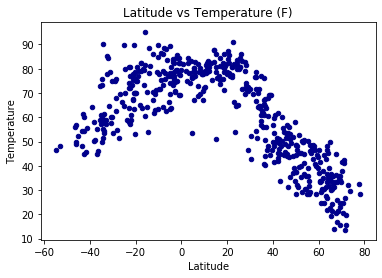

In [9]:
# Creates scatter plot using previously created dataframe
plt.figure
fig1=weather_df.plot.scatter(x='Latitude',y='Temperature',c='DarkBlue',title="Latitude vs Temperature (F)")
plt.savefig("../output_data/fig1.png")
plt.show

# The figure above shows temperature change as we move from the northern hemisphere to the southern hemisphere. As the latitude moves from below the equator and approaches zero, the temperature increases and looks pretty mild at around 40 degrees. As the latitude moves into the northern hemisphere and further away from the equater, the temperature decreases and looks pretty cold.

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

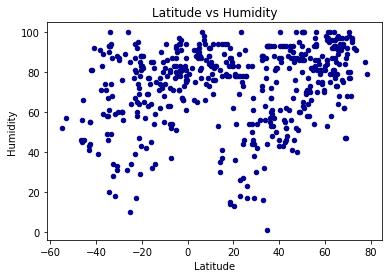

In [10]:
plt.figure
fig2=weather_df.plot.scatter(x='Latitude',y='Humidity',c='DarkBlue',title="Latitude vs Humidity")
plt.savefig("../output_data/fig2.png")
plt.show

# The figure above shows humidity levels as we move across hemispheres. There seems to be slightly higher concentration of higher humidity levels in the northern hemisphere but there are also high humidity levels in the southern hemisphere as well. This figure does not clearly show that a certain latitude also has a certain humidity level. 

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

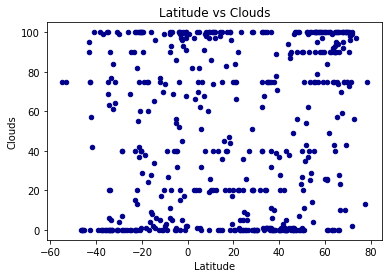

In [11]:
plt.figure
fig3=weather_df.plot.scatter(x='Latitude',y='Clouds',c='DarkBlue',title="Latitude vs Clouds")
plt.savefig("../output_data/fig3.png")
plt.show

# The figure above shows cloud levels as we move across hemispheres. There doesn't appear to be a relationship between the two as cloud levels in both hemispheres are scattered all over the place.

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

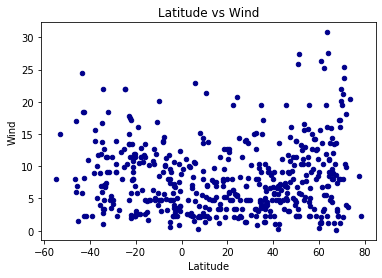

In [13]:
plt.figure
fig4=weather_df.plot.scatter(x='Latitude',y='Wind',c='DarkBlue',title="Latitude vs Wind")
plt.savefig("../output_data/fig4.png")
plt.show

# The figure above shows wind speeds as we move across hemispheres. It appears most wind speeds in both hemispheres are between 0-15 mph.

## Linear Regression

In [15]:
# Plots linear regression equation and plot along with scatter plot
# Divide into hemispheres
north=weather_df.loc[(weather_df["Latitude"]>0)]
south=weather_df.loc[(weather_df["Latitude"]<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

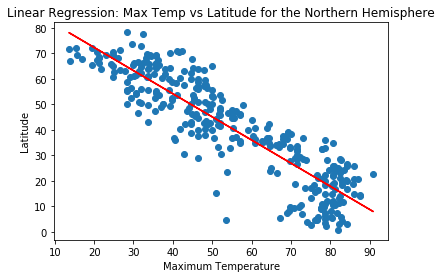

In [16]:
x_values=north['Max Temp']
y_values=north['Latitude']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y= " +str(round(slope,2))+"x + "+str(round(intercept,2))
plt.figure
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.title('Linear Regression: Max Temp vs Latitude for the Northern Hemisphere')
plt.savefig("../output_data/fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

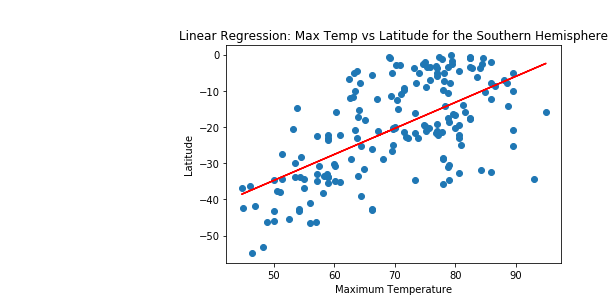

In [17]:
x_values=south['Max Temp']
y_values=south['Latitude']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y= " +str(round(slope,2))+"x + "+str(round(intercept,2))
plt.figure
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.title('Linear Regression: Max Temp vs Latitude for the Southern Hemisphere')
plt.savefig("../output_data/fig6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

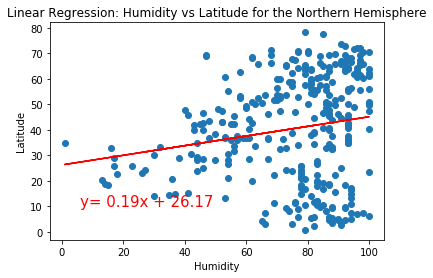

In [18]:
x_values=north['Humidity']
y_values=north['Latitude']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y= " +str(round(slope,2))+"x + "+str(round(intercept,2))
plt.figure
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Linear Regression: Humidity vs Latitude for the Northern Hemisphere')
plt.savefig("../output_data/fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

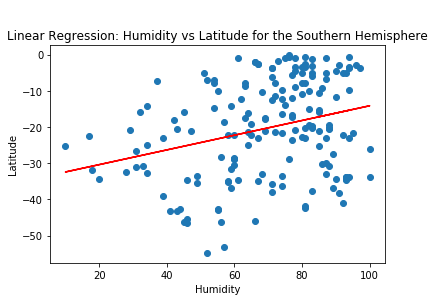

In [19]:
x_values=south['Humidity']
y_values=south['Latitude']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y= " +str(round(slope,2))+"x + "+str(round(intercept,2))
plt.figure
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Linear Regression: Humidity vs Latitude for the Southern Hemisphere')
plt.savefig("../output_data/fig8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

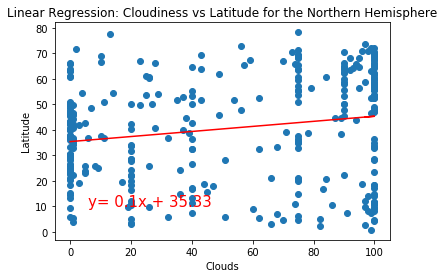

In [20]:
x_values=north['Clouds']
y_values=north['Latitude']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y= " +str(round(slope,2))+"x + "+str(round(intercept,2))
plt.figure
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')
plt.xlabel('Clouds')
plt.ylabel('Latitude')
plt.title('Linear Regression: Cloudiness vs Latitude for the Northern Hemisphere')
plt.savefig("../output_data/fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

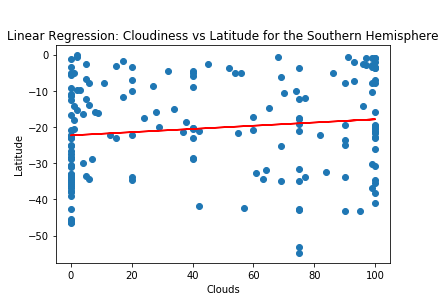

In [21]:
x_values=south['Clouds']
y_values=south['Latitude']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y= " +str(round(slope,2))+"x + "+str(round(intercept,2))
plt.figure
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')
plt.xlabel('Clouds')
plt.ylabel('Latitude')
plt.title('Linear Regression: Cloudiness vs Latitude for the Southern Hemisphere')
plt.savefig("../output_data/fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

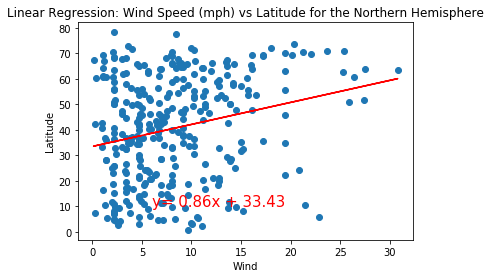

In [22]:
x_values=north['Wind']
y_values=north['Latitude']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y= " +str(round(slope,2))+"x + "+str(round(intercept,2))
plt.figure
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')
plt.xlabel('Wind')
plt.ylabel('Latitude')
plt.title('Linear Regression: Wind Speed (mph) vs Latitude for the Northern Hemisphere')
plt.savefig("../output_data/fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

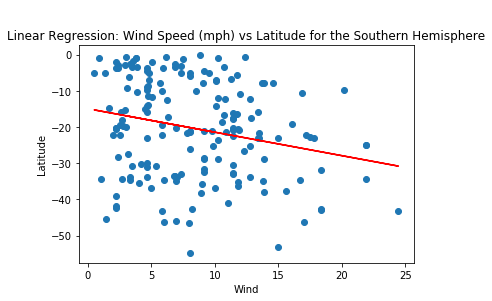

In [23]:
x_values=south['Wind']
y_values=south['Latitude']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y= " +str(round(slope,2))+"x + "+str(round(intercept,2))
plt.figure
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')
plt.xlabel('Wind')
plt.ylabel('Latitude')
plt.title('Linear Regression: Wind Speed (mph) vs Latitude for the Southern Hemisphere')
plt.savefig("../output_data/fig12.png")
plt.show() 

# Update to comments made below: Our TA said to just rerun and clear the error which I did.
# References: I made use of the following to complete this assignment: code from activities, Google, classmates
# All of my code was working fine until I came back to add my analysis so I stopped. I don't want to rerun the entire notebook because of the API calls and the dependence of VacationPy on the results. All errors will resolve when rerunning.